In [1]:
import mesa
import mesa_geo as mg
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
import requests

# # buurten ex water (approx 517)
# url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_BUURT_EXWATER&THEMA=gebiedsindeling"
# ID = "Buurt"

# # wijken ex water (approx 110)
# url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_WIJK_EXWATER&THEMA=gebiedsindeling"
# ID = "Wijk"

# # gebieden ex water (approx 25)
# url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_GEBIED_EXWATER&THEMA=gebiedsindeling"
# ID = "Gebied"

# stadsdelen ex water (approx 9)
url = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=INDELING_STADSDEEL_EXWATER&THEMA=gebiedsindeling"
ID = "Stadsdeel"

r = requests.get(url)
geojson_ams = r.json()

In [3]:
class State(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs):
        super().__init__(unique_id, model, geometry, crs)


class GeoModel(mesa.Model):
    def __init__(self):
        self.space = mg.GeoSpace()

        ac = mg.AgentCreator(agent_class=State, model=self)
        agents = ac.from_GeoJSON(GeoJSON=geojson_ams, unique_id=ID)
        self.space.add_agents(agents)

Zuidoost


/home/renan/documents/Uni/ABM/venv/lib/python3.12/site-packages/mesa_geo/geospace.py:172: UserWarning: Converting State from crs EPSG:4326 to the crs of GeoSpace - EPSG:3857. Please check your crs settings if this is unintended, or set `GeoSpace.warn_crs_conversion` to `False` to suppress this warning message.
  self._check_agent(agent)


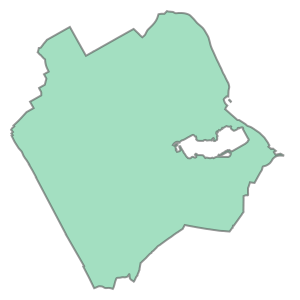

In [4]:
m = GeoModel()

agent = m.space.agents[0]
print(agent.unique_id)
agent.geometry

In [5]:
# print all agent names
for agent in m.space.agents:
    print(agent.unique_id)

Zuidoost
Centrum
Westpoort
Nieuw-West
Oost
Zuid
Weesp
Noord
West


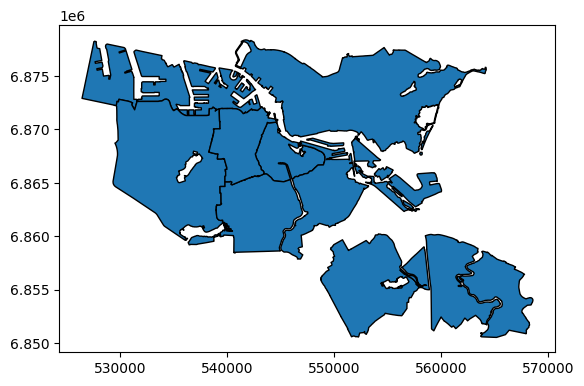

In [20]:
geometries = []
for agent in m.space.agents:
    geometries.append(agent.geometry)

# Create a GeoDataFrame from the geometries
gdf = gpd.GeoDataFrame(geometry=geometries)

# Plot the geometries
fig, ax = plt.subplots()
gdf.plot(ax=ax, edgecolor='black')

# Show the plot
plt.show()